In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [69]:
df = pd.read_csv('Cleaned_Dataset.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [70]:
encoder = LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0], str):
        df[i] = encoder.fit_transform(df[i])
df.head()

In [72]:
X = df.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Outlet_Establishment_Year','Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [73]:
X.head()

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,4,249.8092,9,1,0,1
1,14,48.2692,3,1,2,2
2,10,141.6180,9,1,0,1
3,6,182.0950,0,1,2,0
4,9,53.8614,1,0,2,1


<h2>Multiple Linear Regression Model

In [74]:
mlr = LinearRegression()
mlr.fit(X,y)
Yhat = mlr.predict(X)
print("Intercept:",mlr.intercept_,"||Coefficient:",mlr.coef_)
print('Predicted values->',Yhat[0:4])
print('R-Squared->',np.round(mlr.score(X,y), decimals=3)*100,'% of variation of the Sales is explained by multiple linear model independent variables')
MSE = mean_squared_error(y,Yhat)
print('Mean Squared Error->',MSE,'\n')

Intercept: -624.5742128273 ||Coefficient: [  -1.07733937   15.03826372   66.38446652 -357.24742309 -214.5489686
  842.90025144]
Predicted values-> [4210.92608538 1184.83653712 2577.4542516  1321.00902232]
R-Squared-> 51.800000000000004 % of variation of the Sales is explained by multiple linear model independent variables
Mean Squared Error-> 1275237.8763749965 



[]

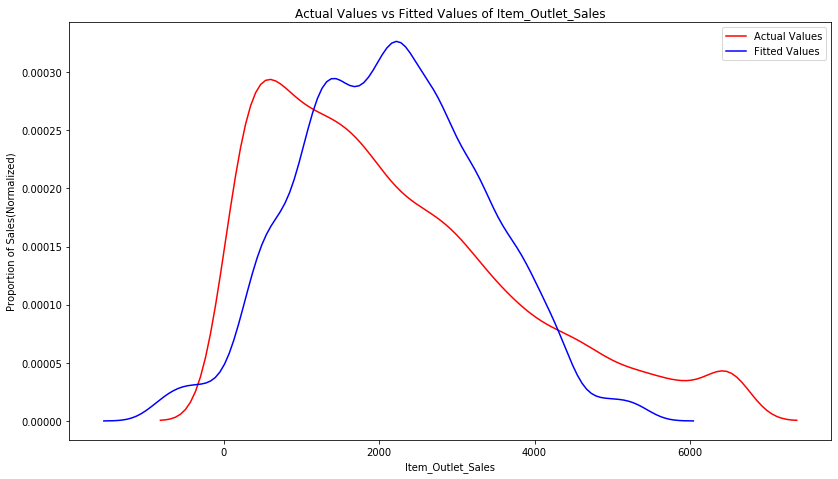

In [75]:
# Distribution Plot
fig = plt.figure(figsize=[13.66,7.68])
sns.distplot(y, hist=False, color='red', label='Actual Values')
sns.distplot(Yhat, hist=False, color='blue', label='Fitted Values')
plt.title('Actual Values vs Fitted Values of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')
plt.plot()

<h2>Support Vector Regressor

In [76]:
svr = SVR(C=1000, gamma=3)
svr.fit(X,y)
Yhat = svr.predict(X)
print('Predicted values->',Yhat[0:4])
print('R-Squared value->',np.round(svr.score(X,y), decimals=3)*100,'% of variation of the Sales is explained by Support Vector Regressor model independent variables')
MSE = mean_squared_error(y,Yhat)
print('Mean Squared Error->',MSE,'\n')

Predicted values-> [2889.18413172  608.40303612 2097.17016428  732.48030292]
R-Squared value-> 63.9 % of variation of the Sales is explained by Support Vector Regressor model independent variables
Mean Squared Error-> 955975.5918032842 



[]

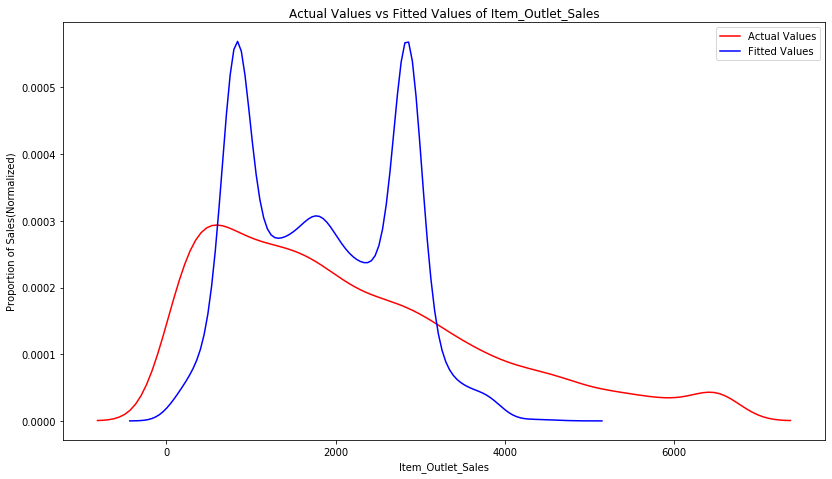

In [77]:
# Distribution Plot
fig = plt.figure(figsize=[13.66,7.68])
sns.distplot(y, hist=False, color='red', label='Actual Values')
sns.distplot(Yhat, hist=False, color='blue', label='Fitted Values')
plt.title('Actual Values vs Fitted Values of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')
plt.plot()

<h2>Decision Tree Regressor

In [78]:
dtr = DecisionTreeRegressor()
dtr.fit(X,y)
Yhat = dtr.predict(X)
print('Predicted values->',Yhat[0:4])
print('R-Squared value->',np.round(dtr.score(X,y), decimals=3)*100,'% of variation of the Sales is explained by Decision Tree Regressor model independent variables')
MSE = mean_squared_error(y,Yhat)
print('Mean Squared Error->',MSE,'\n')

Predicted values-> [3735.138   443.4228 2097.27    732.38  ]
R-Squared value-> 99.9 % of variation of the Sales is explained by Decision Tree Regressor model independent variables
Mean Squared Error-> 3808.22538720485 



[]

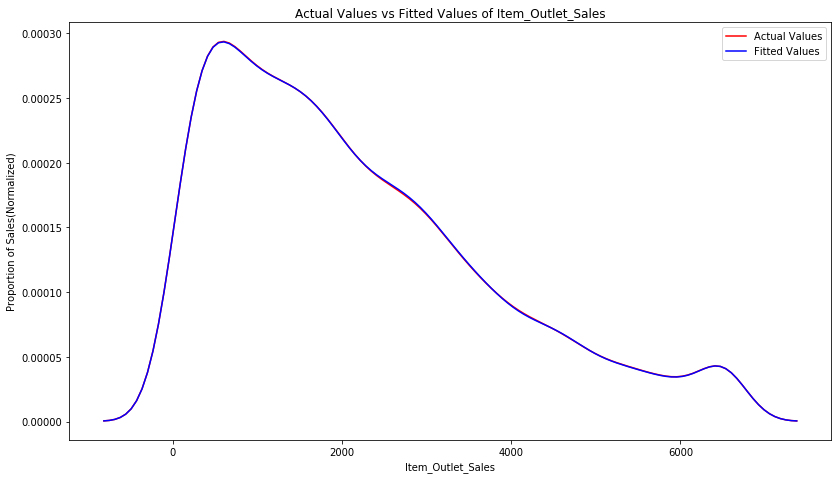

In [79]:
# Distribution Plot
fig = plt.figure(figsize=[13.66,7.68])
sns.distplot(y, hist=False, color='red', label='Actual Values')
sns.distplot(Yhat, hist=False, color='blue', label='Fitted Values')
plt.title('Actual Values vs Fitted Values of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')
plt.plot()

<h2>Random Forest Regressor

In [80]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X,y)
Yhat = rfr.predict(X)
print('Predicted values->',Yhat[0:4])
print('R-Squared value->',np.round(rfr.score(X,y), decimals=3)*100,'% of variation of the Sales is explained by Random Forest model independent variables')
MSE = mean_squared_error(y,Yhat)
print('Mean Squared Error->',MSE,'\n')

Predicted values-> [4195.765072  485.30162  2030.476944  641.704698]
R-Squared value-> 93.4 % of variation of the Sales is explained by Random Forest model independent variables
Mean Squared Error-> 175377.02512314066 



[]

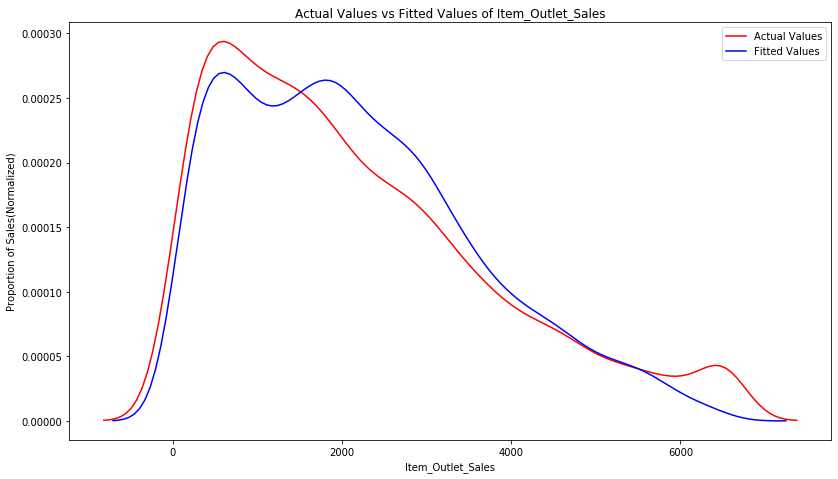

In [81]:
# Distribution Plot
fig = plt.figure(figsize=[13.66,7.68])
sns.distplot(y, hist=False, color='red', label='Actual Values')
sns.distplot(Yhat, hist=False, color='blue', label='Fitted Values')
plt.title('Actual Values vs Fitted Values of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')
plt.plot()

<h2>Bagging Regressor

In [82]:
br = BaggingRegressor()
br.fit(X,y)
Yhat = br.predict(X)
print('Predicted values->',Yhat[0:4])
print('R-Squared value->',np.round(br.score(X,y), decimals=3)*100,'% of variation of the Sales is explained by Bagging model independent variables')
MSE = mean_squared_error(y,Yhat)
print('Mean Squared Error->',MSE,'\n')

Predicted values-> [3768.02852  613.06864 2185.4885   639.36774]
R-Squared value-> 91.2 % of variation of the Sales is explained by Bagging model independent variables
Mean Squared Error-> 233567.49570350826 



[]

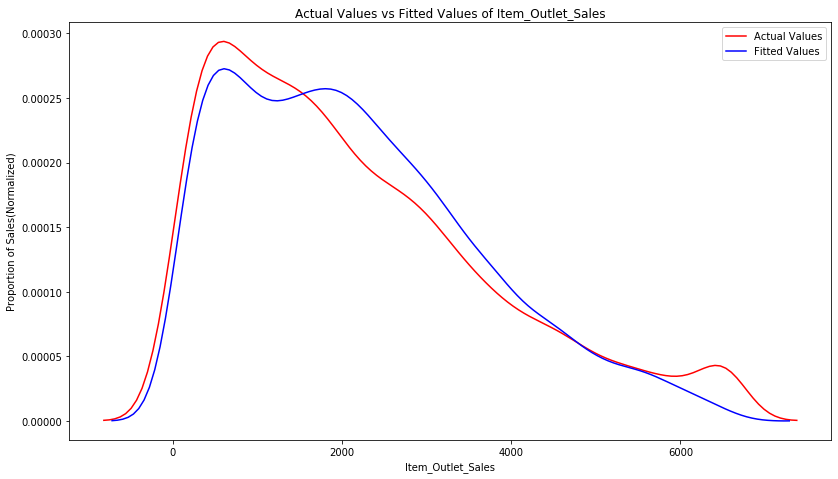

In [83]:
# Distribution Plot
fig = plt.figure(figsize=[13.66,7.68])
sns.distplot(y, hist=False, color='red', label='Actual Values')
sns.distplot(Yhat, hist=False, color='blue', label='Fitted Values')
plt.title('Actual Values vs Fitted Values of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')
plt.plot()

<h2>AdaBoosting Regressor

In [84]:
abr = AdaBoostRegressor()
abr.fit(X,y)
Yhat = abr.predict(X)
print('Predicted values->',Yhat[0:4])
print('R-Squared value->',np.round(abr.score(X,y), decimals=3)*100,'% of variation of the Sales is explained by Bagging model independent variables')
MSE = mean_squared_error(y,Yhat)
print('Mean Squared Error->',MSE,'\n')

Predicted values-> [3834.56473641  928.15480093 2544.57116817  499.03360744]
R-Squared value-> 58.699999999999996 % of variation of the Sales is explained by Bagging model independent variables
Mean Squared Error-> 1091028.0436880977 



[]

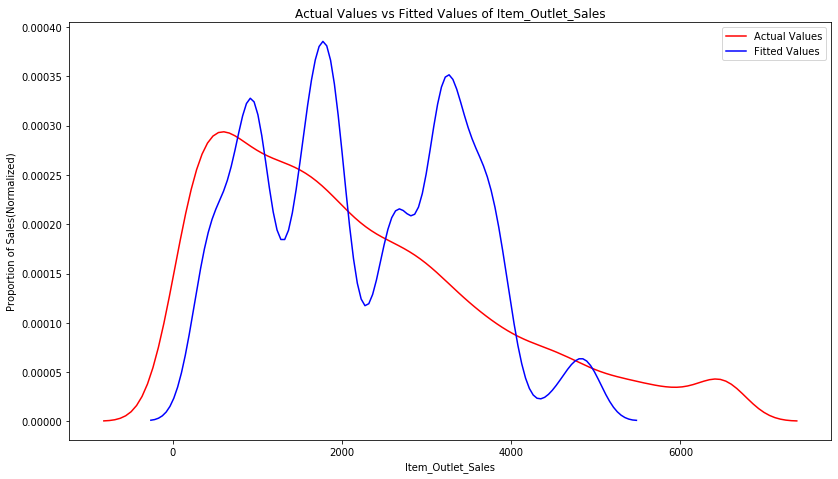

In [85]:
# Distribution Plot
fig = plt.figure(figsize=[13.66,7.68])
sns.distplot(y, hist=False, color='red', label='Actual Values')
sns.distplot(Yhat, hist=False, color='blue', label='Fitted Values')
plt.title('Actual Values vs Fitted Values of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')
plt.plot()

<h2>Gradient Boosting Regressor

In [86]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)
Yhat = gbr.predict(X)
print('Predicted values->',Yhat[0:4])
print('R-Squared value->',np.round(gbr.score(X,y), decimals=3)*100,'% of variation of the Sales is explained by Bagging model independent variables')
MSE = mean_squared_error(y,Yhat)
print('Mean Squared Error->',MSE,'\n')

Predicted values-> [4099.41598732  595.82236224 2198.81419222  495.14711223]
R-Squared value-> 63.2 % of variation of the Sales is explained by Bagging model independent variables
Mean Squared Error-> 973314.1487164043 



[]

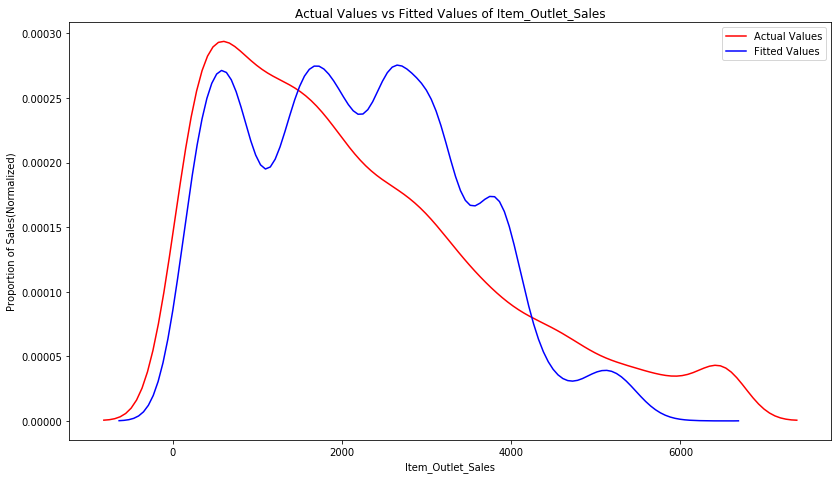

In [87]:
# Distribution Plot
fig = plt.figure(figsize=[13.66,7.68])
sns.distplot(y, hist=False, color='red', label='Actual Values')
sns.distplot(Yhat, hist=False, color='blue', label='Fitted Values')
plt.title('Actual Values vs Fitted Values of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Proportion of Sales(Normalized)')
plt.plot()

<h3>Decision Making: Determining a Good Model Fit

- The model with the higher R-squared value is a better fit for the data.
- The model with the smallest MSE value is a better fit for the data.

<h4>Multiple Linear Regression:</h4>

R-Squared-> 51.800000000000004 % of variation of the Sales is explained by multiple linear model independent variables.

Mean Squared Error-> 1275237.8763749965

<h4>Support Vector Regressor:</h4>

R-Squared value-> 63.9 % of variation of the Sales is explained by Support Vector Regressor model independent variables.

Mean Squared Error-> 955975.5918032842

<h4>Decision Tree Regressor:</h4>

R-Squared value-> 99.9 % of variation of the Sales is explained by Decision Tree Regressor model independent variables.

Mean Squared Error-> 3808.22538720485

<h4>Random Forest Regressor:</h4>

R-Squared value-> 93.4 % of variation of the Sales is explained by Random Forest model independent variables.

Mean Squared Error-> 175684.90619403633

<h4>Bagging Regressor:</h4>

R-Squared value-> 91.2 % of variation of the Sales is explained by Bagging model independent variables.

Mean Squared Error-> 233567.49570350826

<h4>AdaBoosting Regressor:</h4>

R-Squared value-> 58.699999999999996 % of variation of the Sales is explained by AdaBoosting model independent variables.

Mean Squared Error-> 1091028.0436880977

<h4>Gradient Boosting Regressor:</h4>

R-Squared value-> 63.2 % of variation of the Sales is explained by Gradient Boosting model independent variables.

Mean Squared Error-> 973314.1487164043